# Test of Resampling Methods

## Utility Functions

In [1]:
import time

import pandas as pd
import numpy as np
import neurokit2 as nk

%matplotlib inline

In [2]:
def generate_signal(length=1000, end=20):
    signal = np.cos(np.linspace(start=0, stop=end, num=length))
    return(signal)

In [19]:
def resample(signal, method="interpolation"):
    t0 = time.time()
    resampled = nk.signal_resample(
        nk.signal_resample(signal,
                           sampling_rate=100,
                           desired_sampling_rate=50,
                           method=method),
        sampling_rate=50,
        desired_sampling_rate=100,
        method=method)
    t = (time.time() - t0) * 100
    return(resampled, t)
    

def resample_all(signal):
    
    interpolation, t_interpolation = resample(signal, "interpolation")
    sig_numpy, t_numpy = resample(signal, "numpy")
    fft, t_fft = resample(signal, "FFT")
    poly, t_poly = resample(signal, "poly")
    sig_pandas, t_pandas = resample(signal, "pandas")
    
    data = pd.DataFrame({"Original": signal,
                         "Interpolation": interpolation,
                         "Numpy": sig_numpy,
                         "FFT": fft,
                         "Poly": poly,
                         "Pandas": sig_pandas})
    data["Signal_Length"] = len(signal)
    
    timings = pd.DataFrame({"Interpolation": [t_interpolation],
                            "Numpy": [t_numpy],
                            "FFT": [t_fft],
                            "Poly": [t_poly],
                            "Pandas": [t_pandas]})
    timings["Signal_Length"] = len(signal)
    return(data, timings)

In [20]:
def get_difference(data):
    diff = pd.DataFrame({"Interpolation": 1000*(data["Original"].values - data["Interpolation"].values),
                         "Numpy": 1000*(data["Original"].values - data["Numpy"].values),
                         "FFT": 1000*(data["Original"].values - data["FFT"].values),
                         "Poly": 1000*(data["Original"].values - data["Poly"].values),
                         "Pandas": 1000*(data["Original"].values - data["Pandas"].values)})
    return(diff)

## Check Functions

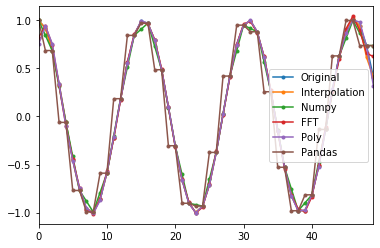

In [21]:
data, timing = resample_all(np.cos(np.linspace(start=0, stop=20, num=50)))
data.iloc[:,:-1].plot(style='.-')

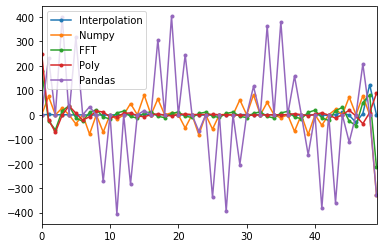

In [6]:
get_difference(data).plot(style='.-')

## Run Test

In [37]:
# This takes some time
timings = []
diffs = []
for length in range(10, 10**5, 200):
    for i in range(10):
        end = np.random.randint(1, 5000)
        data, timing = resample_all(generate_signal(length, end))
        diff = get_difference(data)
        diff = pd.DataFrame(diff.mean()).transpose()
        diff["Signal_Length"] = data["Signal_Length"][0]
        diffs += [diff]
        timings += [timing]
timings = pd.concat(timings)
diffs = pd.concat(diffs)

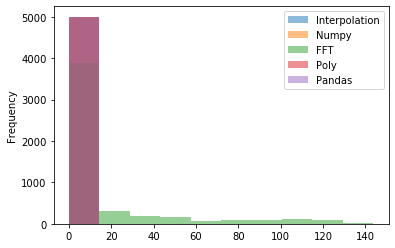

In [38]:
timings.iloc[:,:-1].plot.hist(alpha=0.5)

In [39]:
timings.iloc[:,:-1].describe()

,Interpolation,Numpy,FFT,Poly,Pandas
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.843690,0.144137,15.489238,0.264629,0.452339
std,0.500968,0.089351,29.426544,0.138328,0.173831
min,0.000000,0.000000,0.000000,0.000000,0.199342
25%,0.398898,0.099707,0.598478,0.198936,0.299305
50%,0.797915,0.099826,1.994812,0.299144,0.399137
75%,1.296520,0.199485,12.025100,0.398898,0.498915
max,2.791929,0.498700,143.715382,0.797892,6.283164


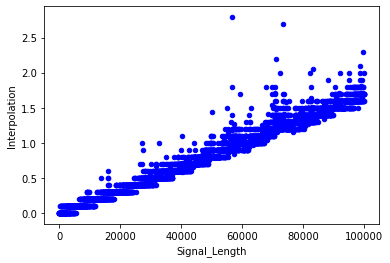

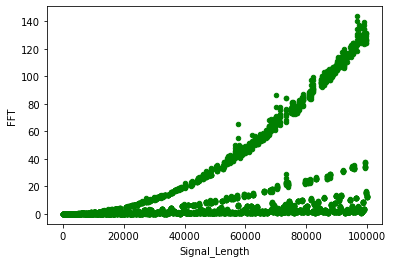

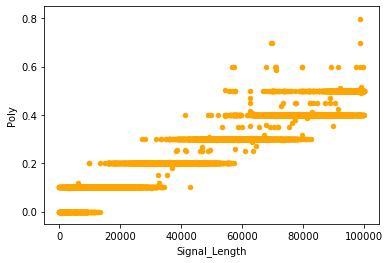

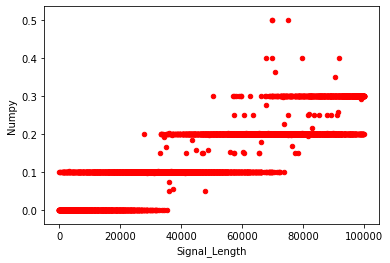

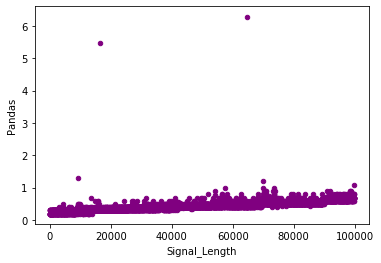

In [40]:
timings.plot.scatter(x='Signal_Length', y='Interpolation', c="blue")
timings.plot.scatter(x='Signal_Length', y='FFT', c="green")
timings.plot.scatter(x='Signal_Length', y='Poly', c="orange")
timings.plot.scatter(x='Signal_Length', y='Numpy', c="red")
timings.plot.scatter(x='Signal_Length', y='Pandas', c="purple")

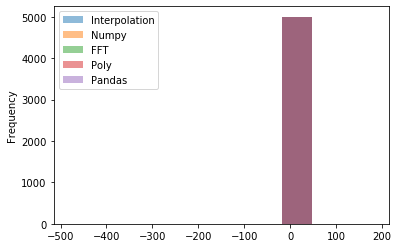

In [41]:
diffs.iloc[:,:-1].plot.hist(alpha=0.5)

In [50]:
diffs.iloc[:,:-1].abs().describe()

,Interpolation,Numpy,FFT,Poly,Pandas
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03
mean,2.005586e-01,1.895393e-01,3.987031e-14,0.085959,2.513644e-01
std,7.130335e+00,4.174606e+00,5.661168e-14,1.799357,4.853036e+00
min,2.989666e-10,3.630774e-08,0.000000e+00,0.000001,2.036200e-08
25%,5.234398e-05,1.285746e-04,2.705313e-15,0.001640,3.231978e-03
50%,1.767461e-04,3.964192e-04,1.150782e-14,0.004433,1.015829e-02
75%,1.626458e-03,1.612028e-03,5.468336e-14,0.009181,2.012779e-02
max,4.816906e+02,2.213174e+02,3.261186e-13,73.466829,1.811800e+02


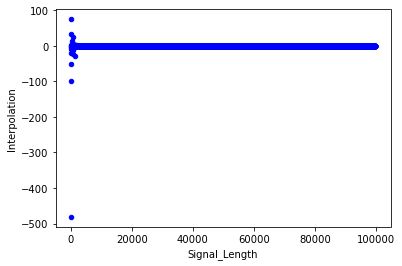

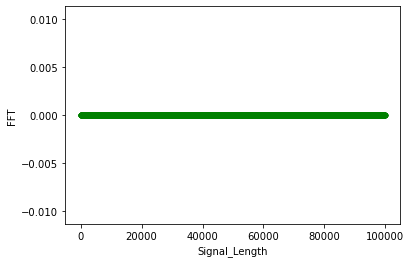

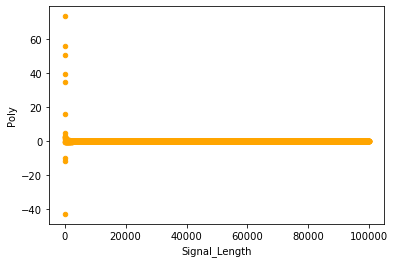

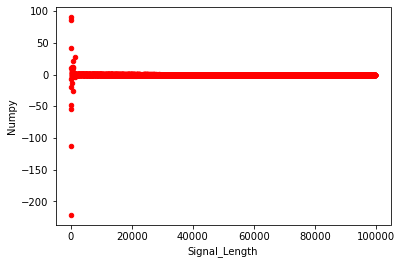

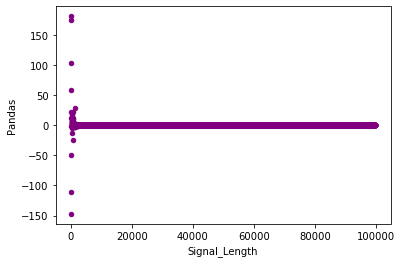

In [43]:
diffs.plot.scatter(x='Signal_Length', y='Interpolation', c="blue")
diffs.plot.scatter(x='Signal_Length', y='FFT', c="green")
diffs.plot.scatter(x='Signal_Length', y='Poly', c="orange")
diffs.plot.scatter(x='Signal_Length', y='Numpy', c="red")
diffs.plot.scatter(x='Signal_Length', y='Pandas', c="purple")